In [1]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 11.3 MB 6.7 MB/s eta 0:00:01
     |████████████████████████████████| 5.3 MB 20.2 MB/s eta 0:00:01
     |████████████████████████████████| 508 kB 49.6 MB/s eta 0:00:01
     |████████████████████████████████| 346 kB 59.7 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install numpy

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 7.8 MB 6.6 MB/s eta 0:00:01
     |████████████████████████████████| 3.1 MB 11.2 MB/s eta 0:00:01
     |████████████████████████████████| 107 kB 12.2 MB/s eta 0:00:01
     |████████████████████████████████| 64 kB 7.0 MB/s eta 0:00:01
     |████████████████████████████████| 2.8 MB 10.6 MB/s eta 0:00:01
     |████████████████████████████████| 249 kB 10.0 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [15]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 294 kB 7.8 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install sklearn

Defaulting to user installation because normal site-packages is not writeable
    ERROR: Command errored out with exit status 1:
     command: /Library/Developer/CommandLineTools/usr/bin/python3 -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/mb/hnm7lf8d5nbb65fv79nzgw100000gn/T/pip-install-8nac7ktp/sklearn_e6232287352a4e99a25cd3734b6dc4ca/setup.py'"'"'; __file__='"'"'/private/var/folders/mb/hnm7lf8d5nbb65fv79nzgw100000gn/T/pip-install-8nac7ktp/sklearn_e6232287352a4e99a25cd3734b6dc4ca/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base /private/var/folders/mb/hnm7lf8d5nbb65fv79nzgw100000gn/T/pip-pip-egg-info-3m9113d2
         cwd: /private/var/folders/mb/hnm7lf8d5nbb65fv79nzgw100000gn/T/pip-install-8nac7ktp/sklea

In [2]:
import pandas as pd
df = pd.read_csv('data(food).csv')
print(df.head())

   food_exp  income
0    115.22    3.69
1    135.98    4.39
2    119.34    4.75
3    114.96    6.03
4    187.05   12.47


In [2]:
import pandas as pd
df = pd.read_csv('data(food).csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   food_exp  40 non-null     float64
 1   income    40 non-null     float64
dtypes: float64(2)
memory usage: 768.0 bytes


In [27]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def regression(data : pd.DataFrame, output_name : str) -> None:

    data = data.rename(columns={output_name: 'y'})  # 종속변수 이름을 'y'로 변경
    X = data.loc[:, data.columns != 'y']
    y = data['y']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
    print('R2', model.score(X_test, y_test))


    # 그래프 시각화
    if X_train.shape[1] == 1:  # 단변수 회귀인 경우
        plt.figure(figsize=(8, 6))
        plt.scatter(X_train, y_train, color='blue', label='Train Data')  # 트레이닝 데이터 산점도
        plt.plot(X_train, model.predict(X_train), color='red', linewidth=2, label='Regression Line')  # 회귀직선
        plt.xlabel(X.columns[0])
        plt.ylabel('y')
        plt.title('Linear Regression Fit')
        plt.legend()
        plt.show()
    
    else:  # 다변수 회귀인 경우
        plt.figure(figsize=(8, 6))
        plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
        plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, linestyle="--", label='Perfect Fit')  # 완벽한 선형 관계
        plt.xlabel('Actual Values')
        plt.ylabel('Predicted Values')
        plt.title('Actual vs Predicted Values')
        plt.legend()
        plt.show()



Mean Squared Error: 10826.844063444609
R2 0.2739994570253801


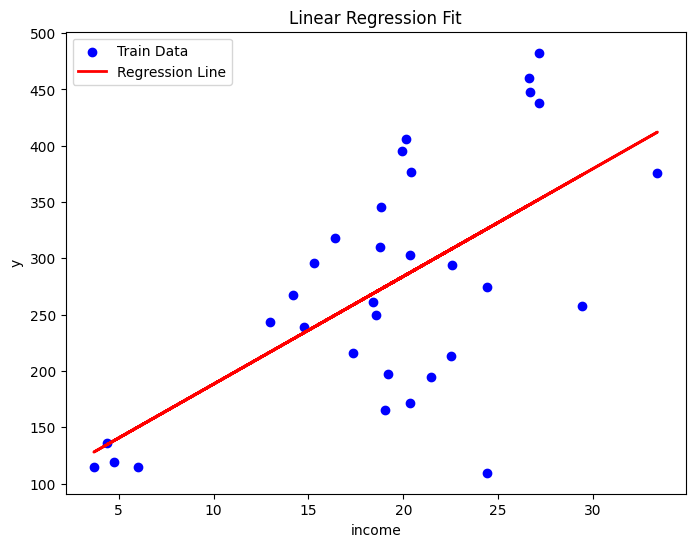

In [37]:
import matplotlib.pyplot as plt
data = pd.read_csv('data(food).csv')
regression(data, 'food_exp')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # 추가 필요
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def regression(data: pd.DataFrame, output_name: str) -> None:
    """
    선형 회귀 분석을 수행하고 결과를 출력하며, 시각화하는 함수.
    
    Parameters:
    data (pd.DataFrame): 회귀 분석을 수행할 데이터프레임
    output_name (str): 종속 변수(타겟 변수)의 이름
    
    Returns:
    None
    """
    # 종속 변수 이름을 'y'로 변경
    data = data.rename(columns={output_name: 'y'})  
    X = data.loc[:, data.columns != 'y']
    y = data['y']

    # 훈련 데이터와 테스트 데이터 분할 (random_state 고정)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 선형 회귀 모델 학습
    model = LinearRegression()
    model.fit(X_train, y_train)

    # 예측
    y_pred = model.predict(X_test)

    # 성능 평가 지표 출력
    print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
    print('R² Score:', model.score(X_test, y_test))

    # 🔹 단변수 회귀 시각화 (X가 하나인 경우)
    if X_train.shape[1] == 1:
        plt.figure(figsize=(8, 6))
        plt.scatter(X_train, y_train, color='blue', label='Train Data')  # 트레이닝 데이터 산점도

        # X_train 정렬 후 예측 → 올바른 회귀 직선 표시
        sorted_indices = X_train.iloc[:, 0].argsort()  # 정렬된 인덱스 찾기
        X_sorted = X_train.iloc[sorted_indices]  # X_train 정렬
        y_sorted_pred = model.predict(X_sorted)  # 정렬된 데이터로 예측

        plt.plot(X_sorted, y_sorted_pred, color='red', linewidth=2, label='Regression Line')  # 회귀직선
        plt.xlabel(X.columns[0])
        plt.ylabel('y')
        plt.title('Linear Regression Fit')
        plt.legend()
        plt.show()
    
    # 🔹 다변수 회귀 시각화 (X가 여러 개인 경우)
    else:
        plt.figure(figsize=(8, 6))
        plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
        plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, linestyle="--", label='Perfect Fit')  # 완벽한 선형 관계
        plt.xlabel('Actual Values')
        plt.ylabel('Predicted Values')
        plt.title('Actual vs Predicted Values')
        plt.legend()
        plt.show()

Mean Squared Error: 12379.138292188916
R² Score: 0.001910513067394981


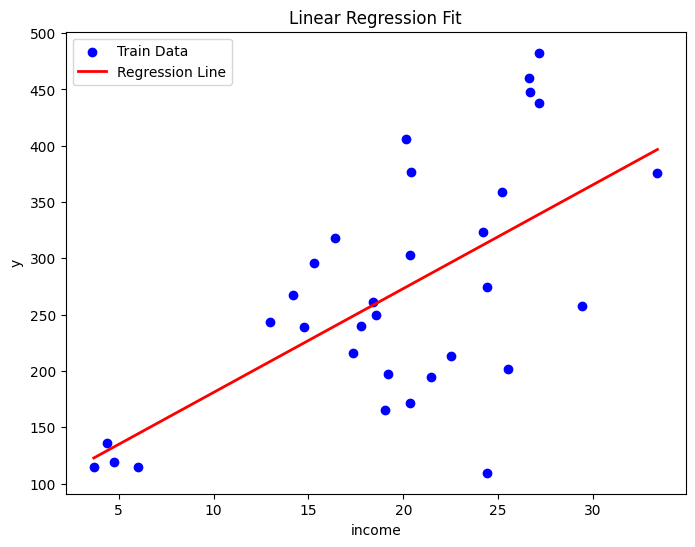

In [2]:
import matplotlib.pyplot as plt
data = pd.read_csv('data(food).csv')
regression(data, 'food_exp')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error

class LinearRegressionModel:
    """
    선형 회귀 분석을 수행하고 결과를 시각화하는 클래스.

    Attributes:
        data (pd.DataFrame): 데이터셋
        output_name (str): 종속 변수(타겟 변수)의 이름
        model (LinearRegression): 학습된 회귀 모델
        X_train (pd.DataFrame): 학습 데이터의 독립 변수
        X_test (pd.DataFrame): 테스트 데이터의 독립 변수
        y_train (pd.Series): 학습 데이터의 종속 변수
        y_test (pd.Series): 테스트 데이터의 종속 변수
    """

    def __init__(self, data: pd.DataFrame, output_name: str, test_size: float = 0.2, random_state: int = 42):
        """
        초기화 메서드.

        Parameters:
            data (pd.DataFrame): 회귀 분석을 수행할 데이터프레임
            output_name (str): 종속 변수(타겟 변수)의 이름
            test_size (float): 테스트 데이터 비율 (기본값 0.2)
            random_state (int): 랜덤 시드 (기본값 42)
        """
        self.data = data.rename(columns={output_name: 'y'})  # 종속변수 이름을 'y'로 변경
        self.X = self.data.loc[:, self.data.columns != 'y']
        self.y = self.data['y']
        self.test_size = test_size
        self.random_state = random_state
        self.model = LinearRegression()

        # 데이터 분할
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            self.X, self.y, test_size=self.test_size, random_state=self.random_state
        )

    def train(self):
        """모델을 학습하는 메서드"""
        self.model.fit(self.X_train, self.y_train)

    def evaluate(self):
        """모델을 평가하고 성능 지표를 출력하는 메서드"""
        y_pred = self.model.predict(self.X_test)
        
        mse = mean_squared_error(self.y_test, y_pred)  # Mean Squared Error
        rmse = np.sqrt(mse)  # Root Mean Squared Error
        r2 = self.model.score(self.X_test, self.y_test)  # R² Score

        # RMSPE 계산 (0으로 나누는 것 방지)
        percentage_errors = (self.y_test - y_pred) / self.y_test
        percentage_errors = percentage_errors.replace([np.inf, -np.inf], np.nan).dropna()
        rmspe = np.sqrt(np.mean(percentage_errors ** 2)) * 100  # 백분율 변환

        print(f'MSE (Mean Squared Error): {mse:.4f}')
        print(f'RMSE (Root Mean Squared Error): {rmse:.4f}')
        print(f'RMSPE (Root Mean Squared Percentage Error): {rmspe:.4f}%')
        print(f'R² Score: {r2:.4f}')

        return mse, rmse, rmspe, r2

    def cross_validate_and_plot(self, n_runs: int = 100):
        """
        5-Fold Cross Validation을 100회 반복하여 성능 지표 추이를 시각화하는 함수.

        Parameters:
            n_runs (int): 반복 횟수 (기본값 100)

        Returns:
            None
        """
        mse_list, rmse_list, rmspe_list, r2_list = [], [], [], []

        for _ in range(n_runs):
            kf = KFold(n_splits=5, shuffle=True, random_state=None)
            mse_values, rmse_values, rmspe_values, r2_values = [], [], [], []

            for train_index, test_index in kf.split(self.X):
                X_train, X_test = self.X.iloc[train_index], self.X.iloc[test_index]
                y_train, y_test = self.y.iloc[train_index], self.y.iloc[test_index]

                model = LinearRegression()
                model.fit(X_train, y_train)
                y_pred = model.predict(X_test)

                mse = mean_squared_error(y_test, y_pred)
                rmse = np.sqrt(mse)
                r2 = model.score(X_test, y_test)

                percentage_errors = (y_test - y_pred) / y_test
                percentage_errors = percentage_errors.replace([np.inf, -np.inf], np.nan).dropna()
                rmspe = np.sqrt(np.mean(percentage_errors ** 2)) * 100

                mse_values.append(mse)
                rmse_values.append(rmse)
                rmspe_values.append(rmspe)
                r2_values.append(r2)

            mse_list.append(np.mean(mse_values))
            rmse_list.append(np.mean(rmse_values))
            rmspe_list.append(np.mean(rmspe_values))
            r2_list.append(np.mean(r2_values))

        # 그래프 그리기
        fig, axes = plt.subplots(2, 2, figsize=(12, 6))
        axes = axes.flatten()

        metrics = [("MSE over Runs", mse_list, "MSE"), 
                   ("RMSE over Runs", rmse_list, "RMSE"),
                   ("R² over Runs", r2_list, "R²"), 
                   ("RMSPE over Runs", rmspe_list, "RMSPE (%)")]

        for ax, (title, values, ylabel) in zip(axes, metrics):
            ax.plot(values)
            ax.set_title(title)
            ax.set_xlabel("Run")
            ax.set_ylabel(ylabel)

        plt.tight_layout()
        plt.show()

MSE (Mean Squared Error): 12379.1383
RMSE (Root Mean Squared Error): 111.2616
RMSPE (Root Mean Squared Percentage Error): 24.6956%
R² Score: 0.0019


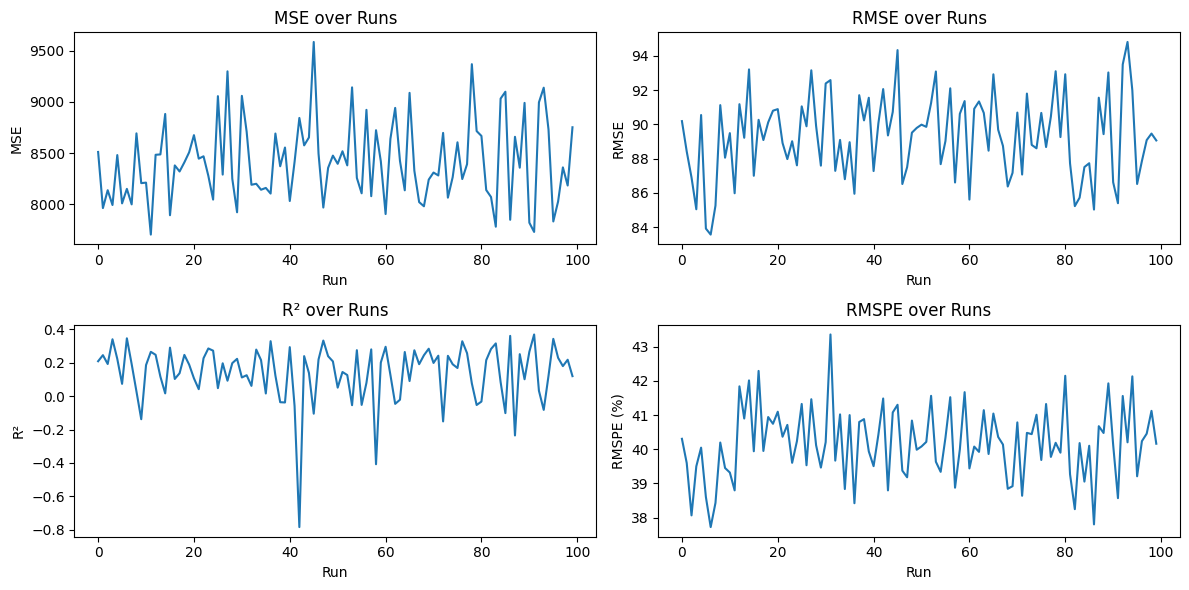

In [4]:
# 데이터 불러오기
df = pd.read_csv('data(food).csv')

# 객체 생성 (food_exp를 종속 변수로 설정)
model = LinearRegressionModel(df, output_name='food_exp')

# 모델 학습
model.train()

# 평가 지표 출력
model.evaluate()

# 5-Fold Cross Validation을 100회 반복하고 성능 지표 추이를 시각화
model.cross_validate_and_plot(n_runs=100)